In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("city_ranking.csv")

In [3]:
data.head()

,city,country,Employment Score,Startup Score,Tourism Score,Housing Score,Food Ranking,Transport Score,Health Rank,Internet Speed Score,University Score,Access to Contraceptive Score,Gender Equality Score,Immigration Tolerence,Personal Freedom and Choice,LGBT friendly Score,Nightlife Score,Beer Ranking,Festival Ranking,Total
0,Berlin,Germany,4.8,9.0,6.2,5.2,7.2,7.1,3.9,5.0,4.9,6.9,7.5,8.4,7.8,9.7,10.0,7.0,8.0,7.14
1,Montréal,Canada,6.0,8.1,5.7,6.4,5.1,3.6,7.4,5.1,5.8,8.6,7.0,9.9,8.1,9.6,8.8,5.1,9.0,7.10
2,London,United Kingdom,6.6,9.8,9.8,0.5,2.2,7.2,4.4,4.7,10.0,9.5,7.1,8.7,9.6,9.4,9.4,2.5,7.5,6.71
3,Amsterdam,Netherlands,7.6,8.3,8.7,0.6,1.7,5.7,6.9,4.5,5.0,7.9,5.5,8.5,10.0,9.9,8.6,4.8,9.7,6.63
4,Toronto,Canada,6.3,9.5,4.4,2.7,6.1,4.3,7.4,7.1,5.2,8.6,7.0,9.9,9.4,9.8,4.5,3.6,9.4,6.60


In [4]:
features=data.columns[2:-1]
countries=[]
for i in range(len(features)):
    indexes=np.where(data.iloc[:,i+2]==max(data.iloc[:,i+2]))
    indexes=indexes[0].tolist()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
    print("City/ies with the best score of the feature :",features[i])
    print("|City Name X Country|")
    for j in range(len(indexes)):
        print(data.iloc[indexes[j],0]," ",data.iloc[indexes[j],1],features[i],":",data.iloc[indexes[j],i+2])
        #countries.append(data.iloc[indexes[j],1])
    print("--------------------------------------------------------------------")    

City/ies with the best score of the feature : Employment Score
|City Name X Country|
Beijing   China Employment Score : 10.0
--------------------------------------------------------------------
City/ies with the best score of the feature : Startup Score
|City Name X Country|
New York City   USA Startup Score : 10.0
--------------------------------------------------------------------
City/ies with the best score of the feature : Tourism Score
|City Name X Country|
Hong Kong   Hong Kong SAR Tourism Score : 10.0
--------------------------------------------------------------------
City/ies with the best score of the feature : Housing Score
|City Name X Country|
Guadalajara   Mexico Housing Score : 10.0
--------------------------------------------------------------------
City/ies with the best score of the feature : Food Ranking
|City Name X Country|
Bangkok   Thailand Food Ranking : 10.0
--------------------------------------------------------------------
City/ies with the best score of th

## Country wise scores

In [5]:
grouped_data=data.groupby(["country"])
for i in range(len(features)):
    print("Feature :",features[i])
    series=grouped_data[features[i]].agg(np.mean)
    country_name_max_score=series[series==max(series)].index[0]
    max_score=max(series)
    print("Country with max score :",country_name_max_score,"|| Score: ",max_score)
    print("Number of observations in the country:",len(data[data.iloc[:,1]==country_name_max_score].iloc[:,0]))
    print("------------------------------------------------")

Feature : Employment Score
Country with max score : Russia || Score:  9.6
Number of observations in the country: 1
------------------------------------------------
Feature : Startup Score
Country with max score : Singapore || Score:  9.1
Number of observations in the country: 1
------------------------------------------------
Feature : Tourism Score
Country with max score : Hong Kong SAR || Score:  10.0
Number of observations in the country: 1
------------------------------------------------
Feature : Housing Score
Country with max score : Colombia || Score:  9.75
Number of observations in the country: 2
------------------------------------------------
Feature : Food Ranking
Country with max score : Thailand || Score:  10.0
Number of observations in the country: 1
------------------------------------------------
Feature : Transport Score
Country with max score : Russia || Score:  7.3
Number of observations in the country: 1
------------------------------------------------
Feature : Hea

# Creating Model 

## Algorithm
1. The algorithm is based on the concept of adding extra values to the ratings of the features wanted by the user in the city
2. The results will give more waitage to the user requirements.
3. Other features will not be discarded as other features are not important to the user but will serve a better recommendation and experience to the user(practically)
4. The bias value is based on practical experimentation and observations , so the model might not give perfect results but is doing the best taking the given time to create the model in consideration.There is definately scope of improvement.
5. Due to the lack of the user data the model had to be created from the scratch.

In [6]:
def model(feature_list):
    biases=[i/len(features) for i in range(0,len(features)*3,3)]
    biases.reverse()
    final_scores={}
    for i in range(data.shape[0]):
        row_score=data.iloc[i:i+1,2:-1].sum(axis=1)[i] #Pandas series index will be set as i so extraction of numeric from series we have to specify the index
        for j in range(len(feature_list)):
            bias_add=data.iloc[i,feature_list[j]+2]*biases[j]
            row_score+=bias_add
        final_scores[row_score]=data.iloc[i,0]    
    return final_scores
    #final_scores
     
    

In [7]:
print("Enter the numbers respective to the features you want in the city \nNote:Enter them according to the neccissity rank i.e. more important first")
for i in range(len(features)):
    print(i,features[i])
print("\n\n\nEnter them as inline order example:'1 4 5 6 3'")    

Enter the numbers respective to the features you want in the city 
Note:Enter them according to the neccissity rank i.e. more important first
0 Employment Score
1 Startup Score
2 Tourism Score
3 Housing Score
4 Food Ranking
5 Transport Score
6 Health Rank
7 Internet Speed Score
8 University Score
9 Access to Contraceptive Score
10 Gender Equality Score
11 Immigration Tolerence
12 Personal Freedom and Choice
13 LGBT friendly Score
14 Nightlife Score
15 Beer Ranking
16 Festival Ranking



Enter them as inline order example:'1 4 5 6 3'


In [8]:
while True:
    input_data=input()
    try:
        input_data=list(map(int,input_data.split(" ")))
        break
    except:
        print("---------------------------------")
        print("oops take care of spaces and do not give extra spaces at the end of the input")
        print("Enter input as example below \n6 7 8 9 2 1")
        print("---------------------------------")

1 0 5 11 12


In [9]:
scores=model(input_data)
sorted_keys=sorted(scores,reverse=True)
sorted_keys[:5]
suggestions=[]
index=[]
for i in range(5):
    index.append(data[data.iloc[:,0]==scores[sorted_keys[i]]].index.tolist()[0])
    suggestions.append(scores[sorted_keys[i]])
print("Top 5 recommended cities for you")
print(suggestions) 
data.iloc[index,:]    

Top 5 recommended cities for you
['London', 'San Francisco', 'Amsterdam', 'Toronto', 'Berlin']


,city,country,Employment Score,Startup Score,Tourism Score,Housing Score,Food Ranking,Transport Score,Health Rank,Internet Speed Score,University Score,Access to Contraceptive Score,Gender Equality Score,Immigration Tolerence,Personal Freedom and Choice,LGBT friendly Score,Nightlife Score,Beer Ranking,Festival Ranking,Total
2,London,United Kingdom,6.6,9.8,9.8,0.5,2.2,7.2,4.4,4.7,10.0,9.5,7.1,8.7,9.6,9.4,9.4,2.5,7.5,6.71
12,San Francisco,USA,9.9,9.9,5.5,0.0,0.9,8.3,1.9,6.7,6.9,7.8,4.5,8.5,6.7,8.3,6.4,2.8,9.0,6.04
3,Amsterdam,Netherlands,7.6,8.3,8.7,0.6,1.7,5.7,6.9,4.5,5.0,7.9,5.5,8.5,10.0,9.9,8.6,4.8,9.7,6.63
4,Toronto,Canada,6.3,9.5,4.4,2.7,6.1,4.3,7.4,7.1,5.2,8.6,7.0,9.9,9.4,9.8,4.5,3.6,9.4,6.60
0,Berlin,Germany,4.8,9.0,6.2,5.2,7.2,7.1,3.9,5.0,4.9,6.9,7.5,8.4,7.8,9.7,10.0,7.0,8.0,7.14


In [16]:
def plot_figures(suggestions):
    f, axes = plt.subplots(1, 5, figsize=(18, 5), sharex=True,sharey=True)
    plt.figure(figsize=(12,5))
    for i in range(5):
        col=i
        x=features[input_data].tolist()
        x.append("Overall City Score")
        #print(x)
        y=data.loc[index[i],features[input_data]].tolist()
        y.append(data.iloc[index[i],-1])
        #print(y)
        g=sns.barplot(x=x,y=y,ax=axes[col])
        g.set_xticklabels(labels=x,rotation=90)
        g.set_title(suggestions[i])

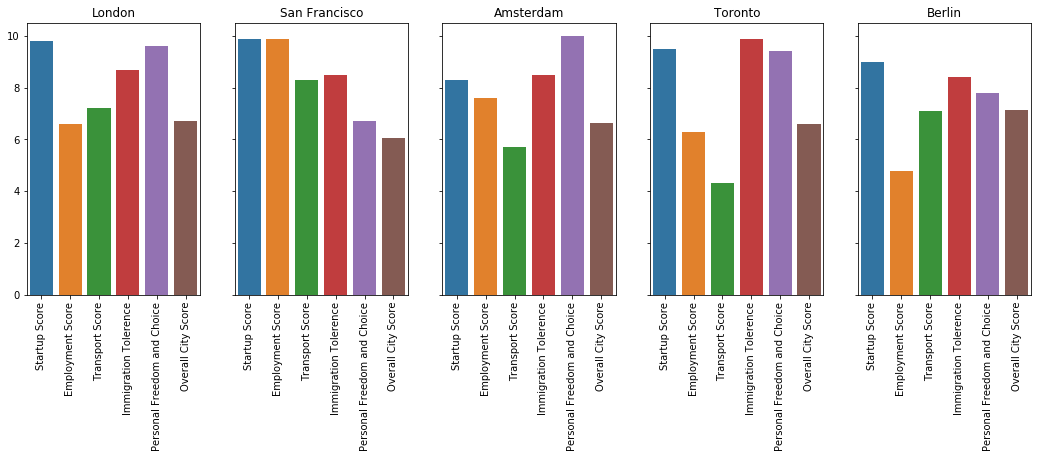

<Figure size 864x360 with 0 Axes>

In [17]:
plot_figures(suggestions)